Data Set Information:-

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# practice basics
import pandas as pd
#importing file - saved file as csv file and then read it
## ? - can we read xls file in pandas? Yes. read_XLS
df = pd.read_csv('D:/Users/ASUS/Desktop/SpringBoard/Capstone1DataSets/ccclients_v2.csv')
#first 5 rows
print(df.head())
#attribute to get column names
print(df.columns)
#shape of the data
print(df.shape)

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689  

This dataset has 25 columns and 30000 rows

In [2]:
#practice basics
#basic info about the dataset - 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

The info shows that there are no blank/missing values
sex should probably be a category - M/F
Categorized data: sex, education, marriage, age-group - need to add column to the data
COnverting sex, education and marriage to categories may save space

In [3]:
# practice basics
#describing the data to identify possible outliers
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

Comments on above:-
1. Education field has a max value of 6 which may be an error
2. Marriage field has a max value of 3 which may be an error

In [4]:
#Practice basics
#value_counts() - trying to identify outliers
print(df['SEX'].value_counts(dropna=False))
print(df['EDUCATION'].value_counts(dropna=False))
print(df['MARRIAGE'].value_counts(dropna=False))
print(df['AGE'].value_counts(dropna=False))

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64


From the above value_counts() check, we can conclude the following:-
1. Education category has 6 values (0 to 6) Below is the explaination for the EDUCATION field in the data set information.
   X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
   5 and 6 are not accounted for but rows of the data do not seem to be errors.
   
2. Marriage category has 4 values (0 to 3) Below is the explaination for the MARRIAGE field in the data set information.
   X4: Marital status (1 = married; 2 = single; 3 = others)
   0 is unaccounted for. There are 54 values under 0 so it desnt seem to be an error.

3. Ages are between 29 and 79 so possibly no erronous values

In [5]:
#Practice basics
#Simple data Vizualizations - detailed data check
import matplotlib.pyplot as plt
#plotting hiostogram - AGE
df['AGE'].plot(kind ='hist',rot=70)
plt.show()


ABove are simple histograms. Additional learning topics for research:-
1. How to reduce/increase divisions in values shown in axies (1 and 2 instead of 1.1, 1.2, ...1.9, 2.0)
2. labeling axes
The data seems to be clean. However there are some points where it is confusing. More below. 


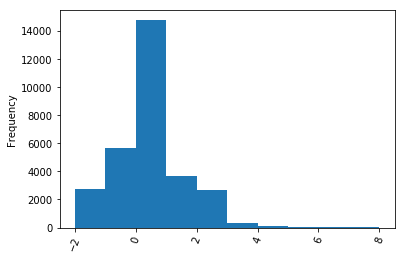

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


In [6]:
#histogram for the PAY_0 field - payment for the most recent month 
df['PAY_0'].plot(kind ='hist',rot=70)
plt.show()
print(df['PAY_0'].value_counts(dropna=False))

Most people pay on time and a chuck of them are late, but most people who are late are late by 1 or 2 months
Additional histogram charts:-
1. Sum of people who are late
2. Sum of people who pay on time
3. Sum of people who are late by more than two months

Charts for each month

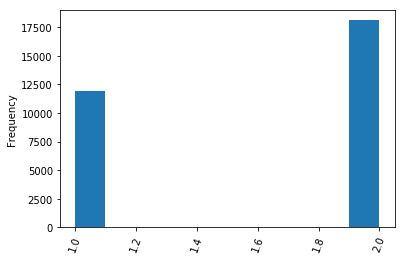

In [7]:
#histogram for other categorical field
df['SEX'].plot(kind ='hist',rot=70)
plt.show()


Male and Female. From the distribbution it seems there are more females than males.

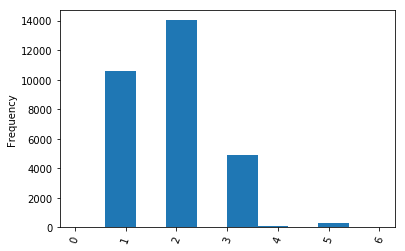

In [8]:
#histogram for other categorical field
df['EDUCATION'].plot(kind ='hist',rot=70)
plt.show()

Renaming columns
1. PAY_0 to PAY_1

In [9]:
#rename column
df.rename(columns={'PAY_0':'PAY_1'})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


Here is the description which the data set information gives for the columns.
"X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above."

PAY_0(X6): Payment for the month of September. 
Followig is the list of values:-
-2: ? (Paid before due date?)
-1: ? (Paid before due date?)
0: Paid on Due Date
1: One month delay
2: Two month delay
3: Three month delay
4: Four month delay
5: Five month delay

6: Six month delay
7: Seven month delay
8: Eight month delay

Some basics have been covered. The next steps are:-
1. Cleaning the data
2. Exploratory Analysis
3. Exporting the data
4. Statistical Analysis (different notebook)
5. Application of Machine learning (different notebook)

Now that we are done playing around with the data, lets work on cleaning it. 
1. Convert SEX, EDUCATION and MARRIAGE columns to categories
    - check for data saved after converting to category
2. Identify and conclude what -2 means in the PAY_ columns: rename it as -1 if it means payment done before time
    - see what values are there in the pay column and bill column corresponding -2 value    


In [10]:
#Converting SEX, EDUCATION and MARRIAGE COlumns to categories
df['SEX']=df['SEX'].astype('category')
df['EDUCATION']=df['EDUCATION'].astype('category')
df['MARRIAGE']=df['MARRIAGE'].astype('category')
# Check for impact on datasize
df.info()
df['SEX'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6      

CategoricalDtype(categories=[1, 2], ordered=False)

- The three fields have been reclassified as categories
- Also, there was a data savings of .6 MB out of 5.7 MB which is almost 10% - will be significant if data size is huge

- Assuming that in the 'SEX' column, 1 means 'Male' and 2 means 'Female' we can reclassify the columns

In [11]:
#renaming categorical fields to better understand content
#df['SEX'].cat.categories = df['SEX'].cat.rename_categories(['Male','Female'])
df.head()
df['SEX']=df['SEX'].cat.rename_categories({1: 'M', 2: 'F'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,F,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,F,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,F,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,F,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,M,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
#renaming the categories for education and marriage
df['MARRIAGE']=df['MARRIAGE'].cat.rename_categories({0: 'NA', 1: 'Married', 2:'Single', 3:'Other'})
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,F,2,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,F,2,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,F,2,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,F,2,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,M,2,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
#Renaming categories for EDUCATION


In [14]:
#Renaming columns - last column 'default payment next month' to 'default' and dropping the old column
df['default']=df['default payment next month'].astype('category')
df= df.drop(columns=['default payment next month'])

In [15]:
df.head()
#df['default']=df['default'].astype('category')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,2,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,F,2,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,F,2,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,F,2,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,M,2,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Basic Exploratory Visualizations:-
1. Distribution of default status

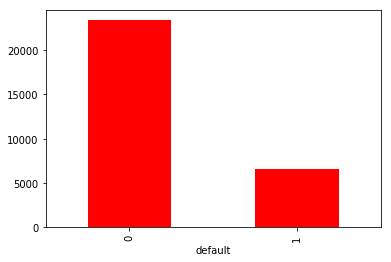

22.12% of customers defaulted


In [16]:
defaultDistribution = df.groupby(['default']).size()
defaultDistribution.plot(kind ='bar',color = 'red')
plt.show()
print("{}% of customers defaulted".format(defaultDistribution[1]/(defaultDistribution[1]+defaultDistribution[0])*100))

Analysis of defaults by:-
1. SEX
2. MARITAL STATUS
3. EDUCATION

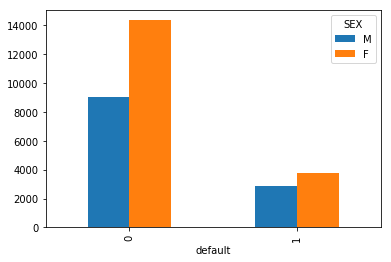

In [17]:
#SEX
defaultByGender = df.groupby(['default','SEX']).size()
defaultByGender.unstack(level=1).plot(kind='bar', stacked=False)


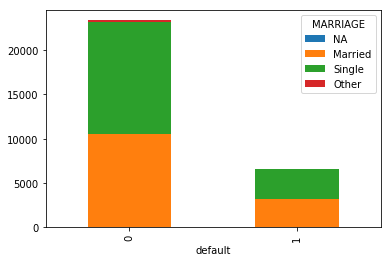

In [18]:
#Marital Status
defaultByMaritalStatus = df.groupby(['default','MARRIAGE']).size()
defaultByMaritalStatus.unstack(level=1).plot(kind='bar', stacked=True)

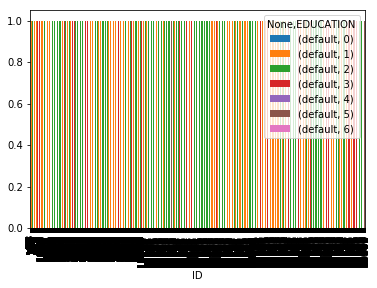

In [20]:
#Education
#defaultByEducation = df.groupby(['default','EDUCATION']).size()
#defaultByEducation.unstack(level=1).plot(kind='bar', stacked=True)

#error code - trying to make a stacked bar chart
defaultByEducation = df.pivot_table(values=['default'], index='ID', columns='EDUCATION', aggfunc='count')
defaultByEducation = defaultByEducation.div(defaultByEducation.sum(1), axis=0)
defaultByEducation.plot(kind='bar', stacked=True)

In [ ]:
#Purchasing/Borrowing limit from the field
